In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib

In [3]:
import random

In [4]:
matplotlib.rcParams["font.size"] = 16

# Stock Market Example

In [5]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


### How do we compute *total gain* for *every year*?

In [6]:
df["total"] = df["return"].cumprod()
df.tail()

,year,return,total
44,2014,1.1369,88.439335
45,2015,1.0138,89.659797
46,2016,1.1196,100.383109
47,2017,1.2183,122.296742
48,2018,0.9557,116.878996


### Assuming you initally invested *1000 dollars in 1970*, what is your *total wealth* in every future year?

In [7]:
starting = 1000
df["wealth"] = df["total"] * starting
df.tail()

,year,return,total,wealth
44,2014,1.1369,88.439335,88439.334579
45,2015,1.0138,89.659797,89659.797397
46,2016,1.1196,100.383109,100383.109165
47,2017,1.2183,122.296742,122296.741896
48,2018,0.9557,116.878996,116878.996230


### How do we create a *line plot* to plot *wealth gain* over the years?

Text(0, 0.5, 'Total wealth ($)')

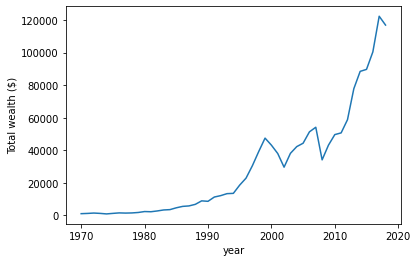

In [8]:
ax = df.set_index("year")["wealth"].plot.line()
ax.set_ylabel("Total wealth ($)")

### Random simulation

In [9]:
random.choice([3, 5, 9]) # sampling with replacement

5

In [10]:
random.choices([3, 5, 9], k = 10)

[9, 3, 5, 3, 5, 3, 5, 3, 5, 5]

### How risky is it in investing in SP500 index going forward?
### Approach:
1. Run simulation, randomly replaying past years.
2. Run hundreds of simulations, explore range of outcomes.

In [11]:
# Step 1
def run_sim(years = 10, starting = 1000):
    rand_returns = random.choices(df["return"], k = years)
    rand_returns = Series(rand_returns)
    rand_returns = rand_returns.cumprod() * starting
    return rand_returns

# Step 2
def run_n_sims(n, years = 10, starting = 1000):
    sims = pd.DataFrame()
    for i in range(n):
        sims["sim" + str(i)] = run_sim(years = 10, starting = 1000) 
    return sims

### For *10 years*, run *50 simulations*

In [12]:
sims = run_n_sims(50)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim40,sim41,sim42,sim43,sim44,sim45,sim46,sim47,sim48,sim49
5,1820.139868,1515.978176,2165.708855,1881.824572,1725.309905,3553.213205,1655.973012,1867.883315,1346.767640,1137.402524,...,678.686716,1624.568862,1746.160751,1828.738591,1890.950723,2647.183712,1492.595054,1311.218675,1882.678743,1829.180277
6,1763.715532,1547.965316,2330.735869,2287.357768,1972.201752,4635.877268,1905.362548,2460.562691,1287.105833,1183.012365,...,898.513344,1924.139360,2311.742218,2509.029347,1915.911273,1946.474184,1835.294878,1498.854068,1384.333679,2265.256855
7,2269.549146,1632.948612,3070.278361,2892.592633,1875.169426,5405.896482,1200.378405,2339.503007,1500.894112,1361.174027,...,989.083489,1212.207797,2923.429209,3321.703953,2499.689437,2385.598759,2054.796145,1102.107396,1582.431829,3020.946542
8,2920.455842,1934.064336,3947.763916,2953.626337,2269.705073,6220.024493,1646.919172,2575.324910,1976.527456,1576.103406,...,1064.451651,1406.161045,2494.854487,4271.046942,3063.619374,3112.490701,1907.261782,1460.292300,1771.690676,3179.546235
9,3214.837790,1874.108341,4798.507040,3398.442464,1668.914140,6302.128816,1210.979667,3050.214824,2602.889007,1527.244201,...,1107.136162,1200.017835,2954.905655,5626.250137,4059.295671,3349.662493,2337.540040,1879.104131,1906.693505,4362.337435


## How do you become a successful Data Scientist?
- By learning how to play both the detective and the lawyer

### How do we create a *line plot* to visualize all of the simulations?
- Be the detective

<AxesSubplot:>

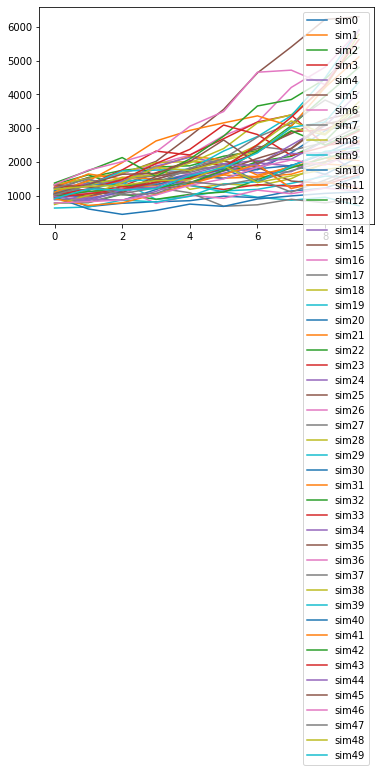

In [13]:
sims.plot.line()

<AxesSubplot:>

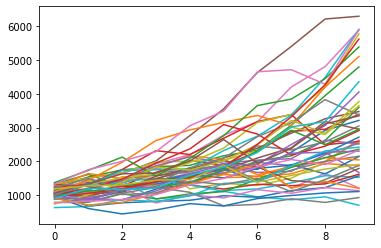

In [14]:
sims.plot.line(legend = False)

### How do we create a *line plot* to present *statistics* of all of the simulations?
- Be the lawyer

### For *10 years*, run *250 simulations*

In [15]:
sims = run_n_sims(250)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
5,1387.873097,2873.396422,1909.724567,1849.336656,2849.385820,2482.421024,1809.272812,1503.459301,2014.525284,1971.863310,...,1930.383023,2347.057554,1348.473591,1770.706843,3032.079478,1247.266003,1690.519424,2093.809702,1543.796544,1798.476577
6,1827.690081,2531.749587,2183.006152,2253.046848,3278.503325,3139.269626,1409.423520,1429.489104,2041.117017,2268.825925,...,2194.652459,1478.646259,1604.413879,2332.552125,3337.713089,1477.261854,2071.900606,1943.474165,1986.557393,1534.819911
7,2168.919819,2894.042953,2590.573401,2627.277929,3117.200961,3304.081282,1933.729070,1696.374719,2320.545937,2631.838073,...,1709.634265,1509.845695,1870.907024,1715.125577,4418.798359,1810.532128,2115.617709,1857.378260,1898.552900,1459.306771
8,2856.250510,2630.685044,2900.405980,2388.195638,2833.535674,3201.654762,1794.887323,1718.766865,2691.833287,1935.190535,...,1881.965399,951.202788,1896.725541,1751.314727,4512.035004,2289.598930,2454.116543,1724.018501,1762.236802,1245.372398
9,3781.390050,2795.628997,3732.242415,2673.823836,3898.378380,2354.176747,1319.780648,1826.533548,3544.875256,2056.526982,...,2479.113020,1305.050225,1803.406644,2320.492013,5806.086644,2724.164806,3103.475780,2218.467007,2091.246413,1650.118428


### Quantile function
- enables to calculate percentiles
- defaults to 50th percentile and computes column percentile

In [16]:
sims.quantile()

sim0      1355.243775
sim1      2434.302096
sim2      1790.189274
sim3      1705.374448
sim4      2452.305640
             ...     
sim245    1234.379257
sim246    1804.582958
sim247    1753.901665
sim248    1830.394851
sim249    1535.829007
Name: 0.5, Length: 250, dtype: float64

In [17]:
sims.quantile(0.5)

sim0      1355.243775
sim1      2434.302096
sim2      1790.189274
sim3      1705.374448
sim4      2452.305640
             ...     
sim245    1234.379257
sim246    1804.582958
sim247    1753.901665
sim248    1830.394851
sim249    1535.829007
Name: 0.5, Length: 250, dtype: float64

In [18]:
sims.quantile(0.7)

sim0      1930.059003
sim1      2680.168230
sim2      2305.276327
sim3      2293.591485
sim4      2929.730363
             ...     
sim245    1577.242936
sim246    2085.015737
sim247    1883.207031
sim248    1983.204164
sim249    1694.625873
Name: 0.7, Length: 250, dtype: float64

### How to change *quantile* to compute percentile of *rows*?
- Using axis parameter.
- axis parameter takes a value of 0 or 1.
- axis works for many functions like mean, std, etc.,
- Default value for axis is 0, so that is column computation
- If you want row-wise computation, you will have to set axis to be 1

<AxesSubplot:>

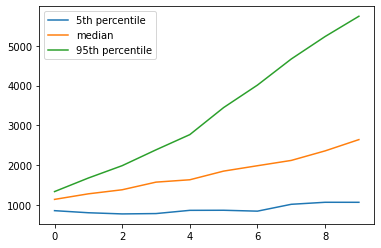

In [19]:
# .quantile
DataFrame({
    "5th percentile": sims.quantile(0.05, axis = 1),
    "median": sims.quantile(0.5, axis = 1),
    "95th percentile": sims.quantile(0.95, axis = 1)
}).plot.line()

# Bar Plot Example w/ Fire Hydrants

In [20]:
df = pd.read_csv("Fire_Hydrants.csv")
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [21]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

Text(0, 0.5, 'Fire hydrant count')

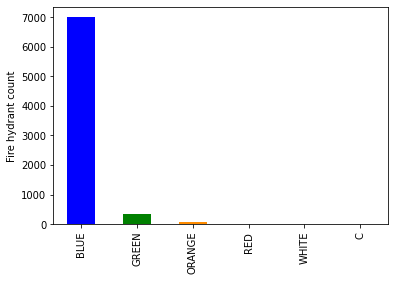

In [22]:
clean_df = df["nozzle_color"].str.upper()# How to handle clean up of the data?
ax = clean_df.value_counts().plot.bar(color=["b", "g", "darkorange", "r", "c", "0.5"])
ax.set_ylabel("Fire hydrant count")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

<AxesSubplot:>

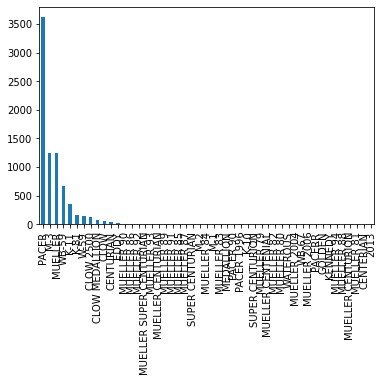

In [23]:
style_counts = df["Style"].str.upper().value_counts()
style_counts.plot.bar()

Text(0.5, 0, 'Hydrant count')

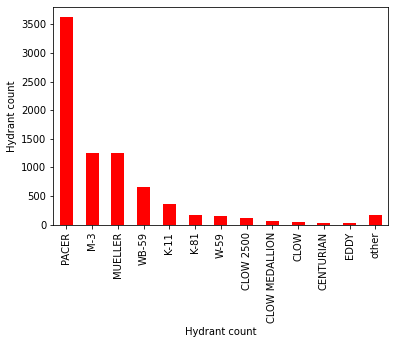

In [24]:
top12 = style_counts.iloc[:12]
top12["other"] = style_counts.iloc[12:].sum()
ax = top12.plot.bar(color="r")
ax.set_ylabel("Hydrant count")
ax.set_xlabel("Hydrant count")

### NEXT LECTURE: In what decade were pacers manufactured? .... The last lecture on plotting is coming!